# **Author: Joshua Johnson**


The Sparks Foundation: Data Science And Business Analytics Internship

# **TASK 4 : Exploratory Data Analysis - Terrorism**

Problem Statement:

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ 

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?

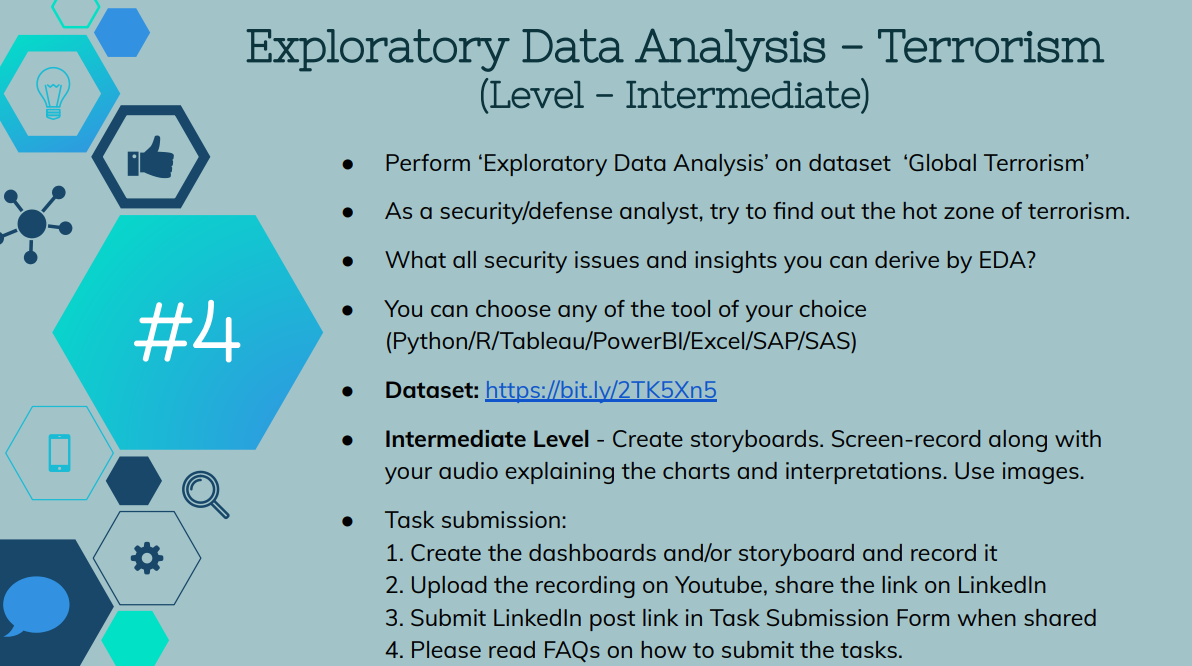

In [1]:
# importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# importing the dataset

terror = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding="latin1")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# renaming the columns

terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','natlty1_txt':'Nationality',
                       'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
terror = terror.reindex(columns=['Year','Month','Day','Country','state','Region','city','latitude','longitude','success','AttackType','Killed',
               'Wounded','Target','Summary','Group','Nationality','Target_type','Weapon_type'])

In [6]:
# selecting the required columns

terror=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','success','AttackType','Killed',
               'Wounded','Target','Group','Nationality','Target_type','Weapon_type']]

In [7]:
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,success,AttackType,Killed,Wounded,Target,Group,Nationality,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,1.0,0.0,Julio Guzman,MANO-D,Dominican Republic,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Belgium,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,1.0,0.0,Employee,Unknown,United States,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,1,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,United States,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,United States,Government (Diplomatic),Incendiary


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


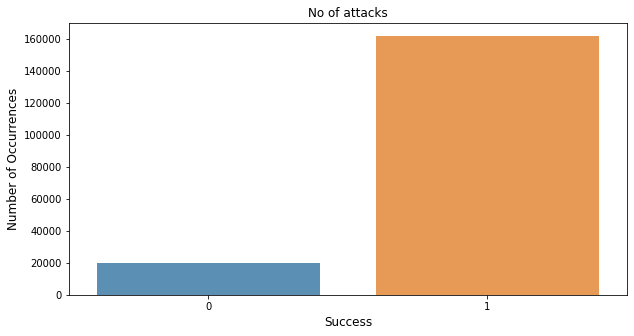

In [8]:
# no of attacks

succ_count  = terror['success'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(succ_count.index, succ_count.values, alpha=0.8)
plt.title('No of attacks')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Success', fontsize=12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


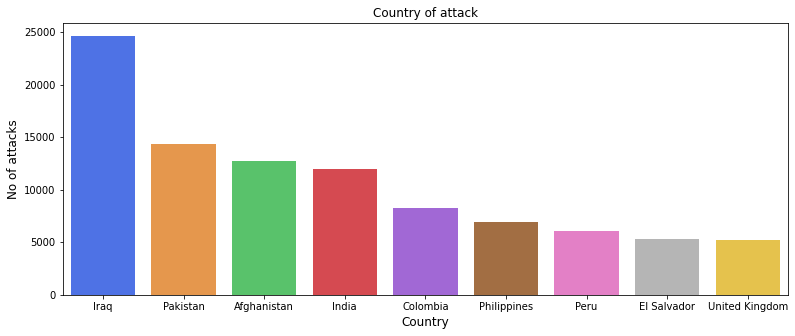

In [9]:
# Countries with most terrorist attacks

succ_count  = terror['Country'].value_counts().loc[lambda x : x>5000] 

plt.figure(figsize=(13,5))
sns.barplot(succ_count.index, succ_count.values, alpha=0.8,palette='bright')
plt.title('Country of attack')
plt.ylabel('No of attacks', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


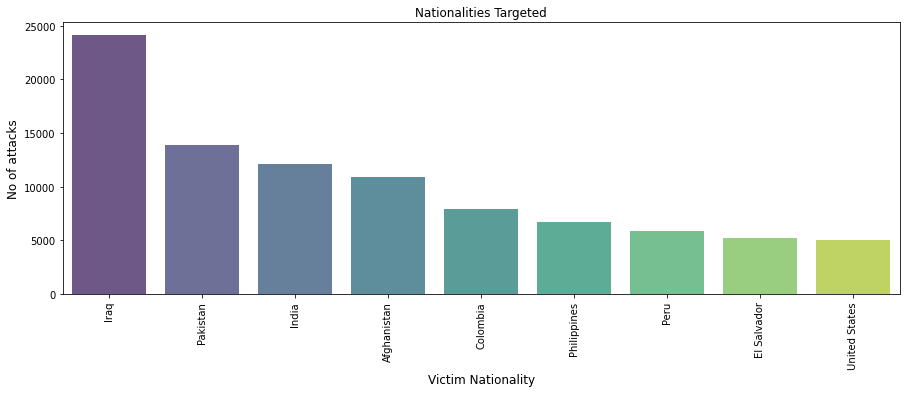

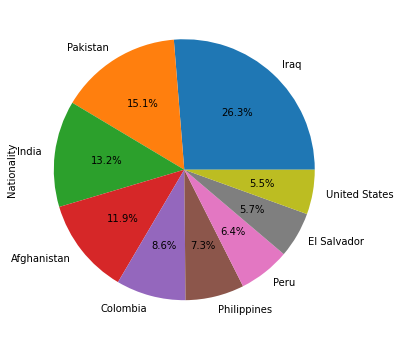

In [10]:
# Nationalities targeted by terrorists

succ_count  = terror['Nationality'].value_counts().loc[lambda x : x>5000] 

plt.figure(figsize=(15,5))
sns.barplot(succ_count.index, succ_count.values, alpha=0.8,palette='viridis')
plt.title('Nationalities Targeted')
plt.ylabel('No of attacks', fontsize=12)
plt.xlabel('Victim Nationality', fontsize=12)
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(6,6))
terror["Nationality"].value_counts().loc[lambda x : x>5000].plot.pie(autopct="%1.1f%%")

In [11]:
# Weapons of attack

df1=terror.groupby("Weapon_type").sum()
df2 = df1.sort_values(["success"],ascending=False)
df4 = df2.reset_index()
df4=df4[['Weapon_type','success']].head(15)
df4

,Weapon_type,success
0,Explosives,79746
1,Firearms,54090
2,Unknown,13420
3,Incendiary,10472
4,Melee,3286
5,Chemical,243
6,Sabotage Equipment,133
7,Vehicle (not to include vehicle-borne explosiv...,117
8,Other,90
9,Fake Weapons,18


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


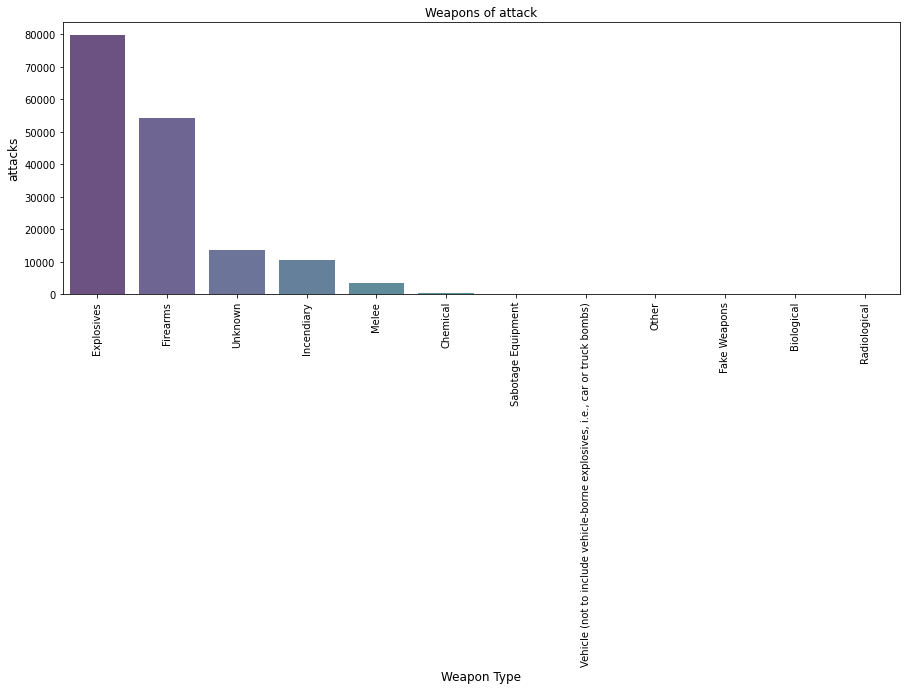

In [12]:
# Visulalizing Weapons of attack


plt.figure(figsize=(15,5))
sns.barplot(df4.Weapon_type, df4.success, alpha=0.8,palette='viridis')
plt.title('Weapons of attack')
plt.ylabel('attacks', fontsize=12)
plt.xlabel('Weapon Type', fontsize=12)
plt.xticks(rotation = 90)
plt.show()


In [13]:
# Target types in various regions

regn = terror.groupby('Target_type')['Region'].value_counts()

regn_df = pd.DataFrame(columns=['Target Type', 'Region', 'counts'])
for items in regn.iteritems():
  reg_type = pd.DataFrame({
            'Target Type': [items[0][0]],
            'Region': [items[0][1]],
            'counts': [items[1]]
   })
  regn_df = regn_df.append(reg_type)

win1=regn_df.groupby('Target Type').sum()
win2 = win1.sort_values(["counts"],ascending=False)
win2

,Region,counts
Target Type,,
Private Citizens & Property,Middle East & North AfricaSouth AsiaSub-Sahara...,43511
Military,Middle East & North AfricaSouth AsiaCentral Am...,27984
Police,South AsiaMiddle East & North AfricaSouth Amer...,24506
Government (General),South AsiaMiddle East & North AfricaSouth Amer...,21283
Business,Western EuropeMiddle East & North AfricaSouth ...,20669
Transportation,South AsiaMiddle East & North AfricaSouth Amer...,6799
Utilities,South AmericaCentral America & CaribbeanMiddle...,6023
Unknown,South AsiaMiddle East & North AfricaWestern Eu...,5898
Religious Figures/Institutions,Middle East & North AfricaSouth AsiaSub-Sahara...,4440


In [ ]:
# World map of hotspots with attack details

import plotly.express as px
fig = px.scatter_mapbox(terror, lat="latitude", lon="longitude", hover_name="city", hover_data=["Region","Killed","Wounded","Group","Target_type","Weapon_type"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
# World map of hotspots with attack details

import plotly.express as px

fig = px.scatter_mapbox(terror, lat="latitude", lon="longitude", hover_name="Country", hover_data=["Region","Killed","Wounded","Group","Target_type","Weapon_type"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**FINAL CONCLUSION**


1. The hotzones with most attacks are Iraq,Pakistan,Afghanistan and India
2. Iraq,Pakistan,Afghanistan and Indian nationals are targeted the most 
3. Explosives and Firearms are mostly used in the attacks
4. Private citizens and properties are targeted the most followed by the military, police and government personell  